<a href="https://colab.research.google.com/github/yegisafari/RL-Project-3/blob/main/RL_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Reinforcement-Learning-RL
##Project 3
##Bandit Learning Algorithms
##Yeganeh Safari

Part 1
. Consider the following grid world problem.

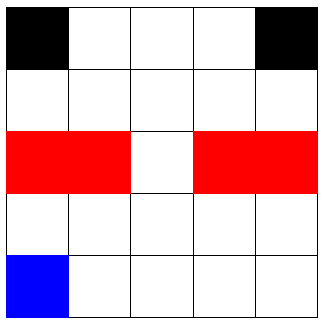

The agent starts at the blue square and moves to a neighbouring state with equal probability. If
the agent moves to a red state, it receives a reward of −20 and goes back to the start, i.e., the blue
square. A move between any two other states receives a reward of −1. A move that attempts to move
outside of the grid receives a reward of −1. The black squares serve as a terminal states. Intuitively,
you can see how the goal here is to pass through the opening in the red “wall” and get to one of the
black squares and hence terminate the episode.
Use the Sarsa and Q-learning algorithms to learn the optimal policy for this task. Plot a trajectory
of an agent utlizing the policy learned by each of the methods. Are they different or similar? Why or
why not? You may assume to use ϵ-greedy action selection for this task. How does the sum of rewards
over an episode behaves for each of these two methods.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import random

In [29]:
grid_size = 6
grid = np.full((grid_size, grid_size), -1)
grid[0, 0] = 0
grid[0, grid_size - 1] = 0
grid[2:4, 1] = -20

start_position = (grid_size - 1, 0)

actions = ['up', 'down', 'left', 'right']

print("Grid Environment:")
print(grid)

Grid Environment:
[[  0  -1  -1  -1  -1   0]
 [ -1  -1  -1  -1  -1  -1]
 [ -1 -20  -1  -1  -1  -1]
 [ -1 -20  -1  -1  -1  -1]
 [ -1  -1  -1  -1  -1  -1]
 [ -1  -1  -1  -1  -1  -1]]


In [30]:
def get_next_state_and_reward(state, action):
    i, j = state
    if action == 'up':
        next_state = (max(i - 1, 0), j)
    elif action == 'down':
        next_state = (min(i + 1, grid_size - 1), j)
    elif action == 'left':
        next_state = (i, max(j - 1, 0))
    elif action == 'right':
        next_state = (i, min(j + 1, grid_size - 1))

    reward = grid[next_state]
    return next_state, reward

Sarsa Update Rule


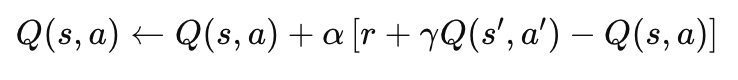

In [31]:
alpha = 0.1
gamma = 0.9
epsilon = 0.1
num_episodes = 500

Q_SARSA = defaultdict(lambda: np.zeros(len(actions)))

def epsilon_greedy_policy(Q, state, epsilon):
    if random.uniform(0, 1) < epsilon:
        return random.choice(actions)
    else:
        return actions[np.argmax(Q[state])]

for episode in range(num_episodes):
    state = start_position
    action = epsilon_greedy_policy(Q_SARSA, state, epsilon)

    while grid[state] != 0:
        next_state, reward = get_next_state_and_reward(state, action)
        next_action = epsilon_greedy_policy(Q_SARSA, next_state, epsilon)

        Q_SARSA[state][actions.index(action)] += alpha * (
            reward + gamma * Q_SARSA[next_state][actions.index(next_action)] - Q_SARSA[state][actions.index(action)]
        )

        state = next_state
        action = next_action

Q-learning Update Rule


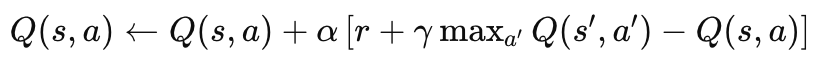

In [32]:
Q_QLEARNING = defaultdict(lambda: np.zeros(len(actions)))

for episode in range(num_episodes):
    state = start_position

    while grid[state] != 0:
        action = epsilon_greedy_policy(Q_QLEARNING, state, epsilon)
        next_state, reward = get_next_state_and_reward(state, action)

        Q_QLEARNING[state][actions.index(action)] += alpha * (
            reward + gamma * np.max(Q_QLEARNING[next_state]) - Q_QLEARNING[state][actions.index(action)]
        )

        state = next_state

###Visualization

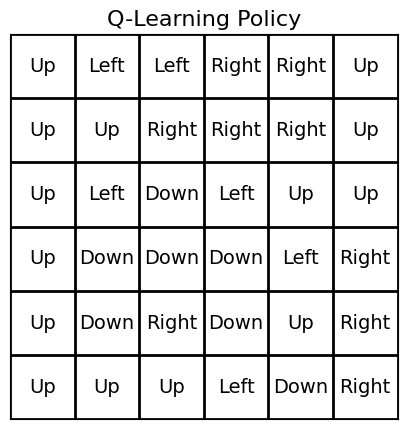

In [34]:
def get_policy(Q):
    policy = {}
    for state, actions_values in Q.items():
        policy[state] = actions[np.argmax(actions_values)]
    return policy

def plot_policy(Q, title="Policy", grid_size=6):
    policy = get_policy(Q)
    grid_policy = np.full((grid_size, grid_size), "", dtype=object)

    for state, action in policy.items():
        grid_policy[state] = action.capitalize()

    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_xticks(np.arange(grid_size + 1) - 0.5, minor=True)
    ax.set_yticks(np.arange(grid_size + 1) - 0.5, minor=True)
    ax.grid(which="minor", color="black", linestyle='-', linewidth=2)
    ax.tick_params(which="minor", size=0)
    ax.set_xticks([])
    ax.set_yticks([])

    for i in range(grid_size):
        for j in range(grid_size):
            ax.text(j, i, grid_policy[i, j], ha='center', va='center', fontsize=14)

    plt.title(title, fontsize=16)
    plt.gca().invert_yaxis()
    plt.show()

plot_policy(Q_QLEARNING, title="Q-Learning Policy", grid_size=6)

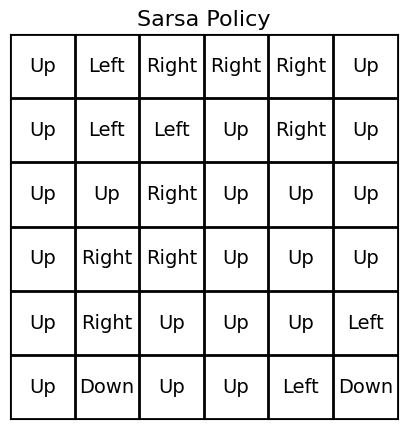

In [35]:
plot_policy(Q_SARSA, title="Sarsa Policy", grid_size=6)

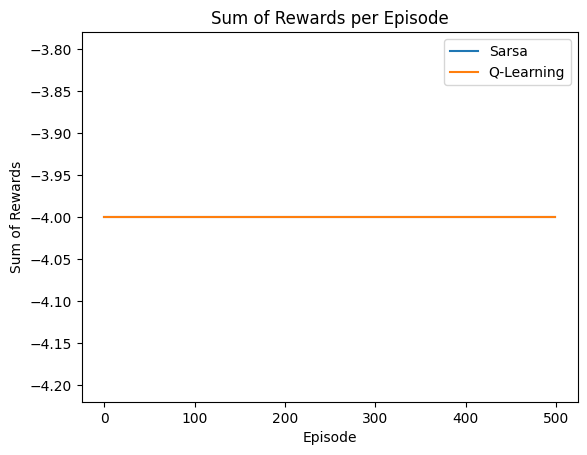

In [37]:
def calculate_sum_of_rewards(Q):
    sum_rewards = []
    for episode in range(num_episodes):
        state = start_position
        total_reward = 0

        while grid[state] != 0:
            action = epsilon_greedy_policy(Q, state, 0)
            next_state, reward = get_next_state_and_reward(state, action)
            total_reward += reward
            state = next_state

        sum_rewards.append(total_reward)
    return sum_rewards

sarsa_rewards = calculate_sum_of_rewards(Q_SARSA)
qlearning_rewards = calculate_sum_of_rewards(Q_QLEARNING)

plt.plot(sarsa_rewards, label="Sarsa")
plt.plot(qlearning_rewards, label="Q-Learning")
plt.xlabel("Episode")
plt.ylabel("Sum of Rewards")
plt.title("Sum of Rewards per Episode")
plt.legend()
plt.show()

In [38]:
def display_q_values(Q):
    q_matrix = np.full((grid_size, grid_size), 0.0)
    for state, values in Q.items():
        q_matrix[state] = np.round(np.max(values), 3)
    return q_matrix

print("Sarsa Q-Value Matrix:")
sarsa_q_matrix = display_q_values(Q_SARSA)
print(sarsa_q_matrix)

Sarsa Q-Value Matrix:
[[ 0.     0.    -0.87  -0.837  0.     0.   ]
 [ 0.    -0.867 -1.562 -1.484 -0.915  0.   ]
 [-1.003 -0.904 -2.239 -2.096 -1.685 -1.007]
 [-2.687 -1.533 -2.958 -2.656 -2.293 -1.897]
 [-4.051 -4.018 -3.503 -3.143 -2.777 -2.519]
 [-4.83  -4.392 -3.914 -3.473 -3.096 -2.845]]


In [39]:
print("Q-Learning Q-Value Matrix:")
qlearning_q_matrix = display_q_values(Q_QLEARNING)
print(qlearning_q_matrix)

Q-Learning Q-Value Matrix:
[[ 0.     0.    -0.651 -0.651  0.     0.   ]
 [ 0.    -0.771 -1.119 -1.025 -0.651  0.   ]
 [-1.    -0.82  -1.647 -1.476 -1.254 -0.911]
 [-1.9   -0.682 -2.073 -1.843 -1.619 -1.481]
 [-2.71  -2.881 -2.473 -2.149 -1.953 -1.813]
 [-3.439 -3.142 -2.708 -2.374 -2.138 -1.979]]


In [41]:
print("Gradient Monte Carlo Value Function Matrix:")
print(np.round(theta_mc, 3))

Gradient Monte Carlo Value Function Matrix:
[[-0.664 -0.507 -0.108  0.142 -0.1   -0.151 -0.206]
 [-0.664 -0.496 -0.147 -0.136 -0.228 -0.161 -0.002]
 [-0.568 -0.395 -0.196 -0.01   0.055  0.024  0.073]
 [-0.156 -0.09  -0.021  0.216  0.178  0.261  0.34 ]
 [-0.156 -0.048  0.066  0.26   0.3    0.283  0.4  ]
 [-0.15  -0.024  0.099  0.262  0.443  0.592  0.626]
 [-0.092  0.013  0.035  0.206  0.359  0.609 -0.896]]


In [42]:
print("Semi-Gradient TD(0) Value Function Matrix:")
print(np.round(theta_td, 3))

Semi-Gradient TD(0) Value Function Matrix:
[[ 0.779 -0.168 -0.084 -0.045 -0.02  -0.008 -0.003]
 [-0.151 -0.1   -0.057 -0.03  -0.014 -0.001  0.003]
 [-0.075 -0.056 -0.035 -0.015  0.     0.016  0.023]
 [-0.038 -0.027 -0.014  0.001  0.022  0.044  0.062]
 [-0.015 -0.008  0.002  0.024  0.058  0.096  0.15 ]
 [-0.     0.006  0.019  0.051  0.11   0.203  0.35 ]
 [ 0.007  0.012  0.03   0.066  0.155  0.356 -0.252]]


In [43]:
print("Exact Value Function Matrix:")
print(np.round(value_exact, 3))

Exact Value Function Matrix:
[[-1.    -0.868 -0.372 -0.16  -0.064 -0.018 -0.   ]
 [-0.868 -0.505 -0.255 -0.115 -0.04  -0.     0.018]
 [-0.372 -0.255 -0.141 -0.058  0.     0.04   0.064]
 [-0.16  -0.115 -0.058  0.     0.058  0.115  0.16 ]
 [-0.064 -0.04   0.     0.058  0.141  0.255  0.372]
 [-0.018 -0.     0.04   0.115  0.255  0.505  0.868]
 [-0.     0.018  0.064  0.16   0.372  0.868  1.   ]]


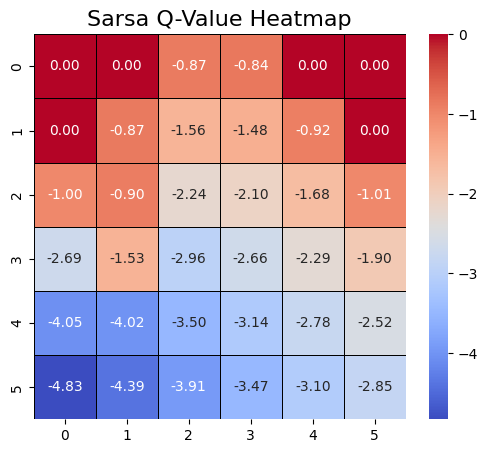

In [57]:
import seaborn as sns

def plot_q_value_heatmap(Q, title="Q-Value Heatmap", grid_size=6):
    q_matrix = np.full((grid_size, grid_size), np.nan)
    for state, values in Q.items():
        q_matrix[state] = np.max(values)

    plt.figure(figsize=(6, 5))
    sns.heatmap(q_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, linecolor='black')
    plt.title(title, fontsize=16)
    plt.show()

plot_q_value_heatmap(Q_SARSA, title="Sarsa Q-Value Heatmap", grid_size=6)

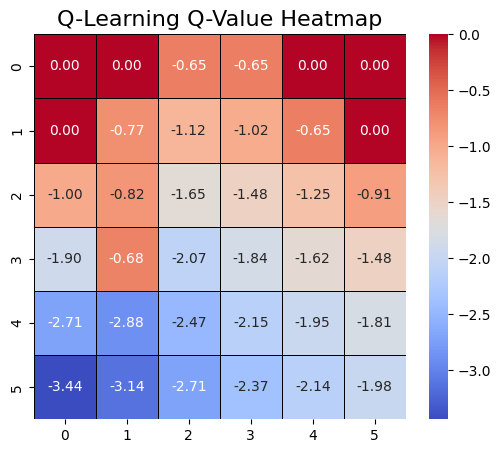

In [58]:
plot_q_value_heatmap(Q_QLEARNING, title="Q-Learning Q-Value Heatmap", grid_size=6)

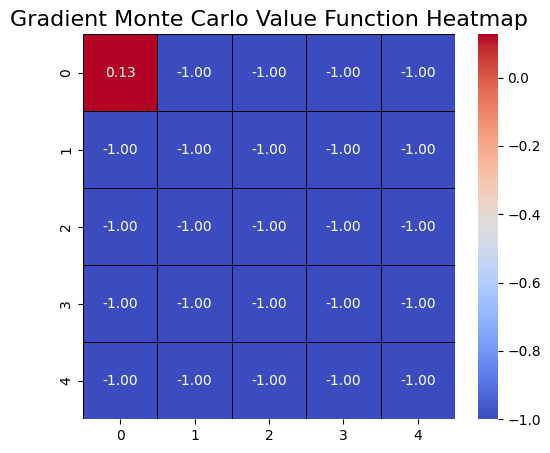

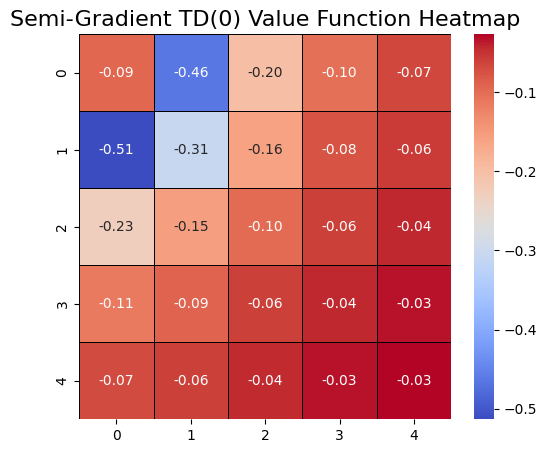

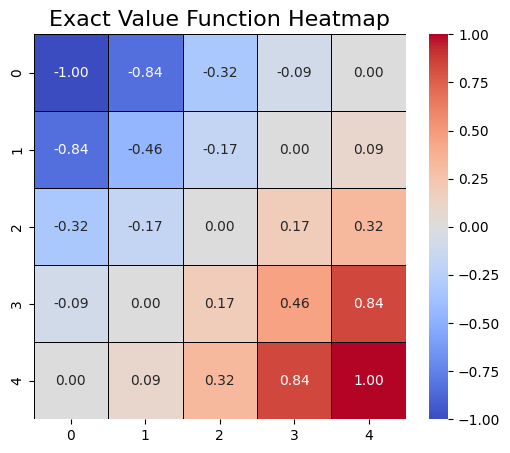

In [59]:
def plot_value_function_heatmap(value_matrix, title="Value Function Heatmap"):
    plt.figure(figsize=(6, 5))
    sns.heatmap(value_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, linecolor='black')
    plt.title(title, fontsize=16)
    plt.show()

plot_value_function_heatmap(theta_mc, title="Gradient Monte Carlo Value Function Heatmap")
plot_value_function_heatmap(theta_td, title="Semi-Gradient TD(0) Value Function Heatmap")
plot_value_function_heatmap(value_exact, title="Exact Value Function Heatmap")

Part 2
. Consider a scenario where we have a random walk on a 7 × 7 grid. That is, we are equally likely to
move up, down, left, or right. Suppose that we start the random walk at the precise center of the grid.
1
We assume that the lower left and upper right corners are terminal states, with, respectively, rewards
of −1 and 1. Rewards for transitions between two states are 0, if an attempt to transition outside the
wall is made, the agent stays in the same spot and receives a reward of 0. Compute the value function
for this “random walk” policy using (1) gradient Monte Carlo method and (2) the semi-gradient TD(0)
method with an affine function approximation. How does it compare to the exact value function?

In [63]:
grid_size = 7
start_position = (grid_size // 2, grid_size // 2)

terminal_states = {(0, 0): -1, (grid_size-1, grid_size-1): 1}

actions = ['up', 'down', 'left', 'right']

def get_next_state_and_reward_random_walk(state, action):
    i, j = state
    if action == 'up':
        next_state = (max(i - 1, 0), j)
    elif action == 'down':
        next_state = (min(i + 1, grid_size - 1), j)
    elif action == 'left':
        next_state = (i, max(j - 1, 0))
    elif action == 'right':
        next_state = (i, min(j + 1, grid_size - 1))

    if next_state in terminal_states:
        reward = terminal_states[next_state]
    else:
        reward = 0

    return next_state, reward

print("Start Position:", start_position)
print("Terminal States and Rewards:", terminal_states)

Start Position: (3, 3)
Terminal States and Rewards: {(0, 0): -1, (6, 6): 1}


Implement Gradient Monte Carlo Method


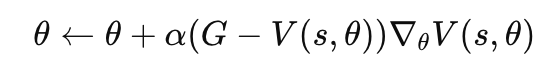

In [64]:
theta_mc = np.random.randn(grid_size, grid_size)
alpha_mc = 0.01
num_episodes_mc = 1000

def get_value_mc(state, theta):
    return theta[state]

for episode in range(num_episodes_mc):
    state = start_position
    trajectory = []

    while state not in terminal_states:
        action = random.choice(actions)
        next_state, reward = get_next_state_and_reward_random_walk(state, action)
        trajectory.append((state, reward))
        state = next_state

    G = 0
    for state, reward in reversed(trajectory):
        G += reward
        theta_mc[state] += alpha_mc * (G - get_value_mc(state, theta_mc))

print("Gradient Monte Carlo Value Function Matrix:")
print(np.round(theta_mc, 3))

Gradient Monte Carlo Value Function Matrix:
[[ 1.64  -0.705 -0.423 -0.256 -0.189 -0.085  0.009]
 [-0.548 -0.455 -0.179 -0.124 -0.088  0.046 -0.002]
 [-0.392 -0.3   -0.106 -0.022 -0.074  0.093  0.041]
 [-0.315 -0.159 -0.017  0.149  0.224  0.347  0.385]
 [-0.432 -0.152  0.046  0.207  0.255  0.3    0.439]
 [-0.264  0.01   0.05   0.185  0.243  0.4    0.563]
 [-0.113  0.002  0.039  0.111  0.307  0.578 -0.715]]


Semi-Gradient TD(0) Update Rule

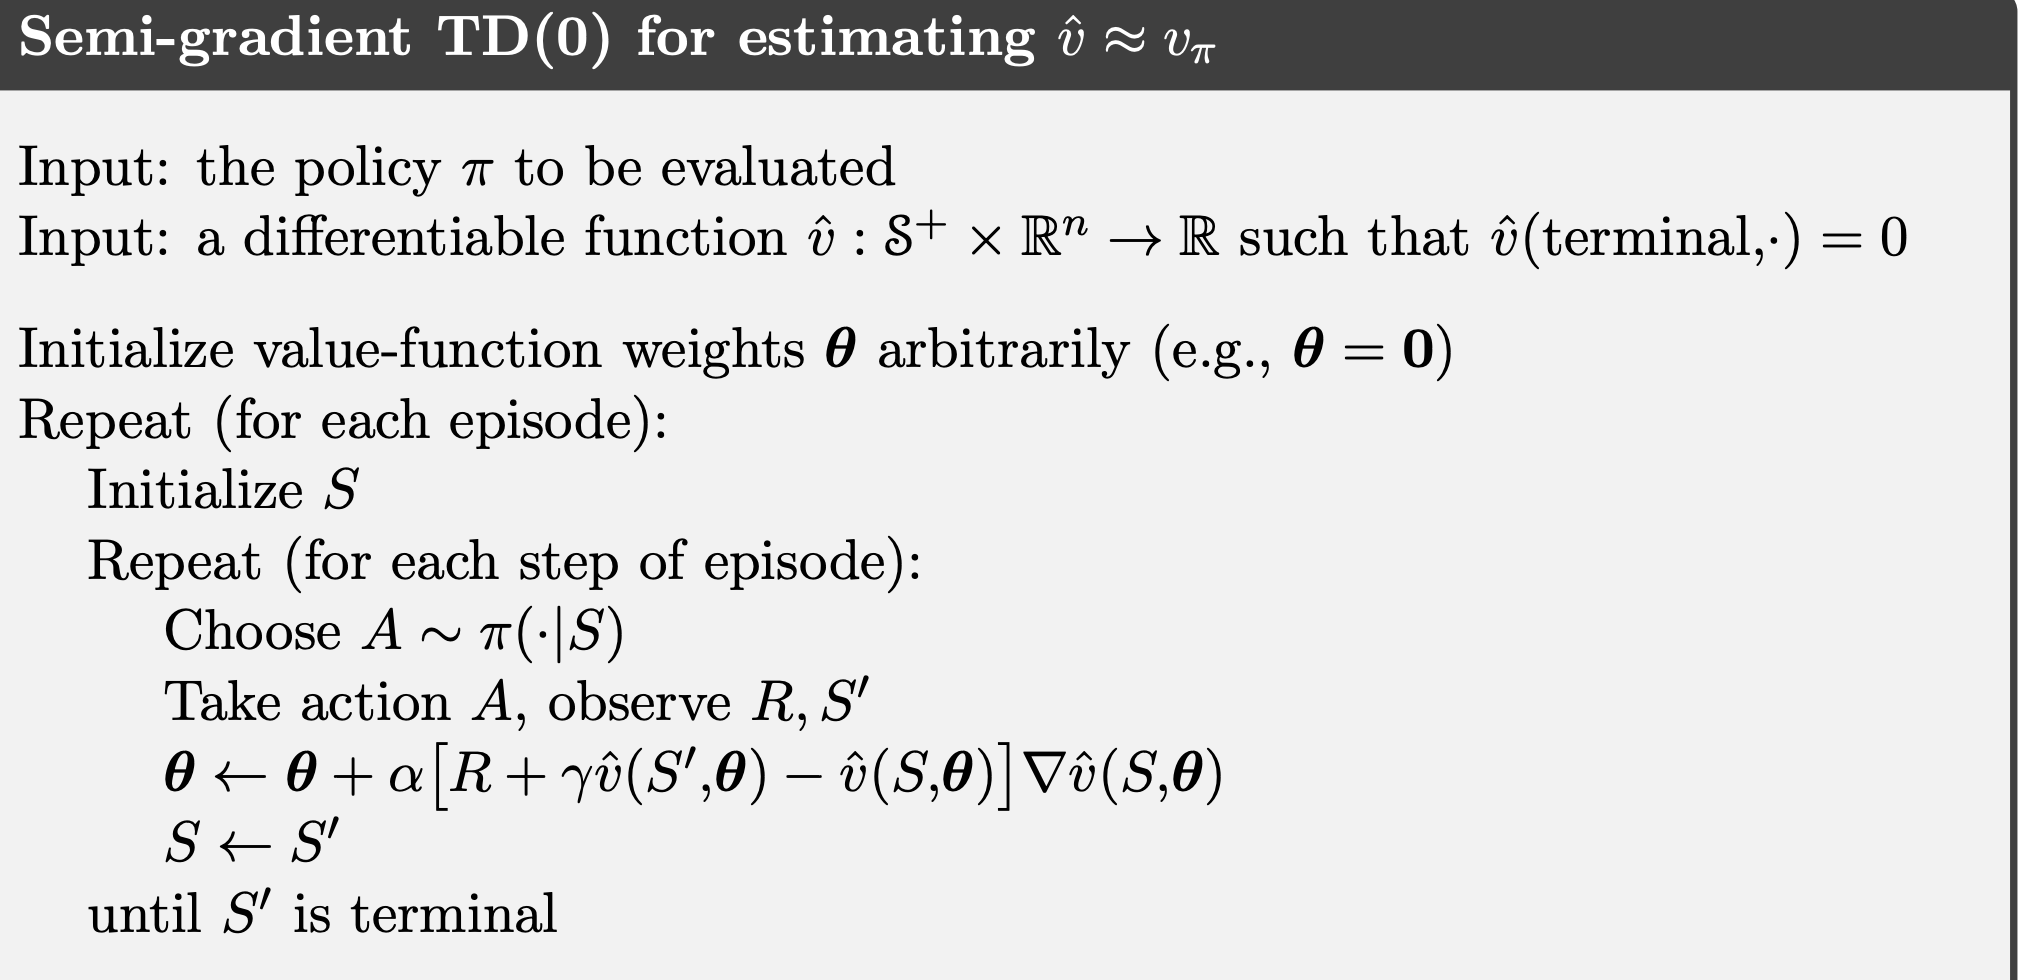

In [65]:
theta_td = np.random.randn(grid_size, grid_size)
alpha_td = 0.01
gamma = 0.9
num_episodes_td = 1000

for episode in range(num_episodes_td):
    state = start_position

    while state not in terminal_states:
        action = random.choice(actions)
        next_state, reward = get_next_state_and_reward_random_walk(state, action)

        td_target = reward + gamma * get_value_mc(next_state, theta_td)
        td_error = td_target - get_value_mc(state, theta_td)

        theta_td[state] += alpha_td * td_error

        state = next_state

print("Semi-Gradient TD(0) Value Function Matrix:")
print(np.round(theta_td, 3))

Semi-Gradient TD(0) Value Function Matrix:
[[-0.057 -0.512 -0.233 -0.098 -0.046 -0.021 -0.01 ]
 [-0.522 -0.307 -0.16  -0.074 -0.032 -0.009  0.001]
 [-0.227 -0.155 -0.087 -0.037 -0.001  0.019  0.035]
 [-0.109 -0.082 -0.044 -0.005  0.036  0.07   0.099]
 [-0.05  -0.037 -0.009  0.027  0.093  0.197  0.294]
 [-0.024 -0.012  0.015  0.069  0.172  0.4    0.699]
 [-0.014 -0.004  0.024  0.093  0.26   0.723  0.702]]


Exact Value Function

In [66]:
value_exact = np.zeros((grid_size, grid_size))

value_exact[0, 0] = -1
value_exact[grid_size-1, grid_size-1] = 1

for _ in range(1000):
    new_value = np.copy(value_exact)

    for i in range(grid_size):
        for j in range(grid_size):
            if (i, j) in terminal_states:
                continue

            values = []
            for action in actions:
                next_state, reward = get_next_state_and_reward_random_walk((i, j), action)
                values.append(reward + gamma * value_exact[next_state])

            new_value[i, j] = np.mean(values)

    value_exact = new_value

print("Exact Value Function Matrix:")
print(np.round(value_exact, 3))

Exact Value Function Matrix:
[[-1.    -0.868 -0.372 -0.16  -0.064 -0.018 -0.   ]
 [-0.868 -0.505 -0.255 -0.115 -0.04  -0.     0.018]
 [-0.372 -0.255 -0.141 -0.058  0.     0.04   0.064]
 [-0.16  -0.115 -0.058  0.     0.058  0.115  0.16 ]
 [-0.064 -0.04   0.     0.058  0.141  0.255  0.372]
 [-0.018 -0.     0.04   0.115  0.255  0.505  0.868]
 [-0.     0.018  0.064  0.16   0.372  0.868  1.   ]]


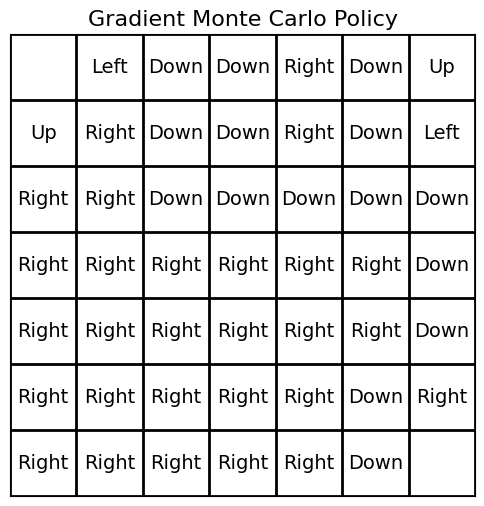

In [67]:
def get_policy_from_value_function(theta):
    policy = {}
    for i in range(grid_size):
        for j in range(grid_size):
            state = (i, j)
            if state in terminal_states:
                continue

            values = []
            for action in actions:
                next_state, _ = get_next_state_and_reward_random_walk(state, action)
                values.append(theta[next_state])

            best_action = actions[np.argmax(values)]
            policy[state] = best_action
    return policy

def plot_policy(policy, title="Policy"):
    grid_policy = np.full((grid_size, grid_size), "", dtype=object)

    for state, action in policy.items():
        grid_policy[state] = action.capitalize()

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xticks(np.arange(grid_size + 1) - 0.5, minor=True)
    ax.set_yticks(np.arange(grid_size + 1) - 0.5, minor=True)
    ax.grid(which="minor", color="black", linestyle='-', linewidth=2)
    ax.tick_params(which="minor", size=0)
    ax.set_xticks([])
    ax.set_yticks([])

    for i in range(grid_size):
        for j in range(grid_size):
            ax.text(j, i, grid_policy[i, j], ha='center', va='center', fontsize=14)

    plt.title(title, fontsize=16)
    plt.gca().invert_yaxis()
    plt.show()

policy_mc = get_policy_from_value_function(theta_mc)
plot_policy(policy_mc, title="Gradient Monte Carlo Policy")

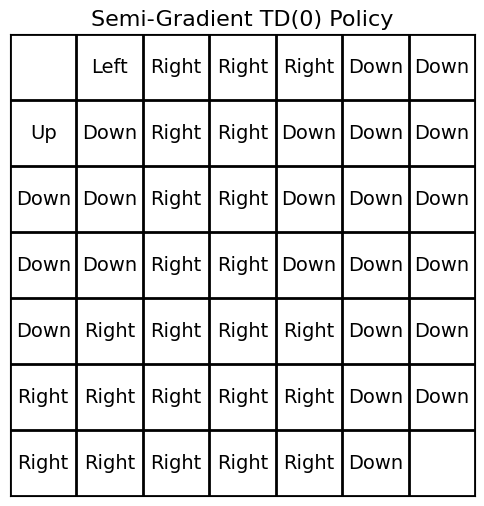

In [68]:
policy_td = get_policy_from_value_function(theta_td)
plot_policy(policy_td, title="Semi-Gradient TD(0) Policy")

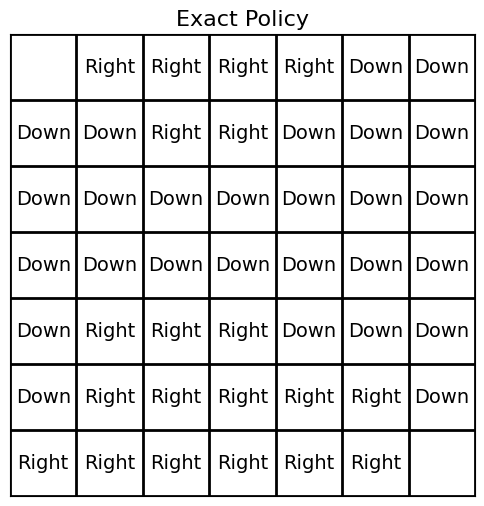

In [70]:
policy_exact = get_policy_from_value_function(value_exact)
plot_policy(policy_exact, title="Exact Policy")